In [1]:
from sympy import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.signal as signal

In [2]:
j = I
t = Symbol('t')

In [3]:
def step(offset):
    return Piecewise((0, t-offset<0), (1, True))

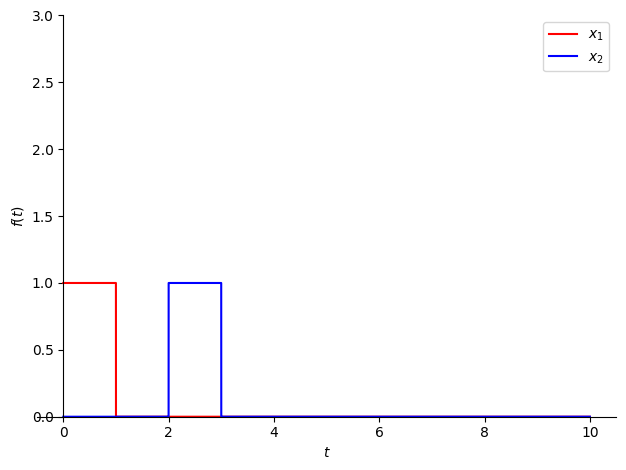

In [4]:
x1 = step(0)-step(1)
x2 = step(2)-step(3)
p = plot(x1, (t,0,10),label='$x_1$',line_color='r',ylim=(0,3),legend=True,show=False)
p.extend(plot(x2, (t,0,10),label='$x_2$',line_color='b',show=False))
p.show()

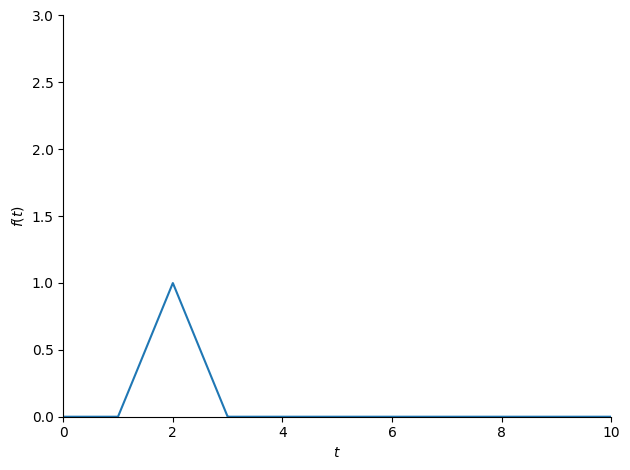

In [5]:
tau = Symbol('tau')
correlation = integrate(x1.subs(t,tau-t)*x2.subs(t,tau), (tau,-oo,oo)).simplify()
plot(correlation,t=(0,10),xlim=(0,10),ylim=(0,3));

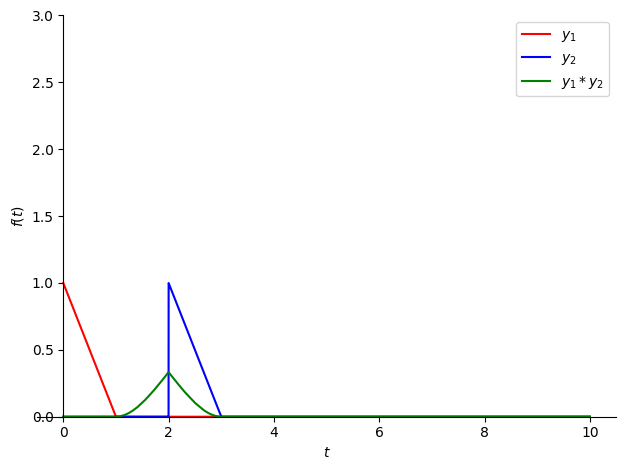

In [6]:
y1 = x1*(1-t)
y2 = x2*(3-t)
correlation = integrate(y1.subs(t,tau-t)*y2.subs(t,tau), (tau,-oo,oo)).simplify()
p = plot(y1, (t,0,10),label='$y_1$',line_color='r',ylim=(0,3),legend=True,show=False)
p.extend(plot(y2, (t,0,10),label='$y_2$',line_color='b',show=False))
p.extend(plot(correlation, (t,0,10),label='$y_1*y_2$',line_color='g',alpha=0.75,show=False))
p.show()

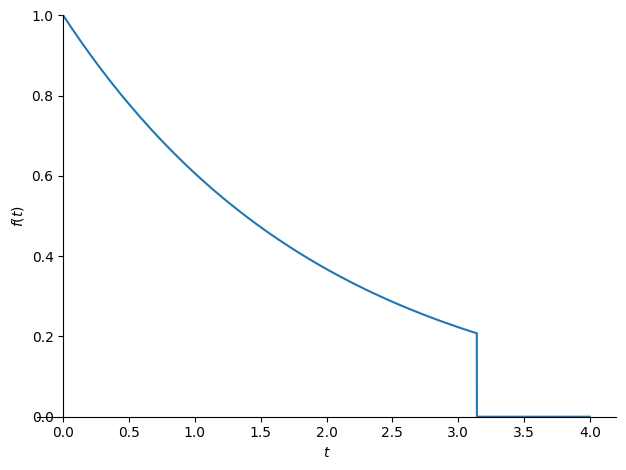

In [7]:
x = exp(-t/2)*(step(0)-step(pi))
plot(x, (t,0,4),ylim=(0,1));

/tmp/ipykernel_90537/312241683.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


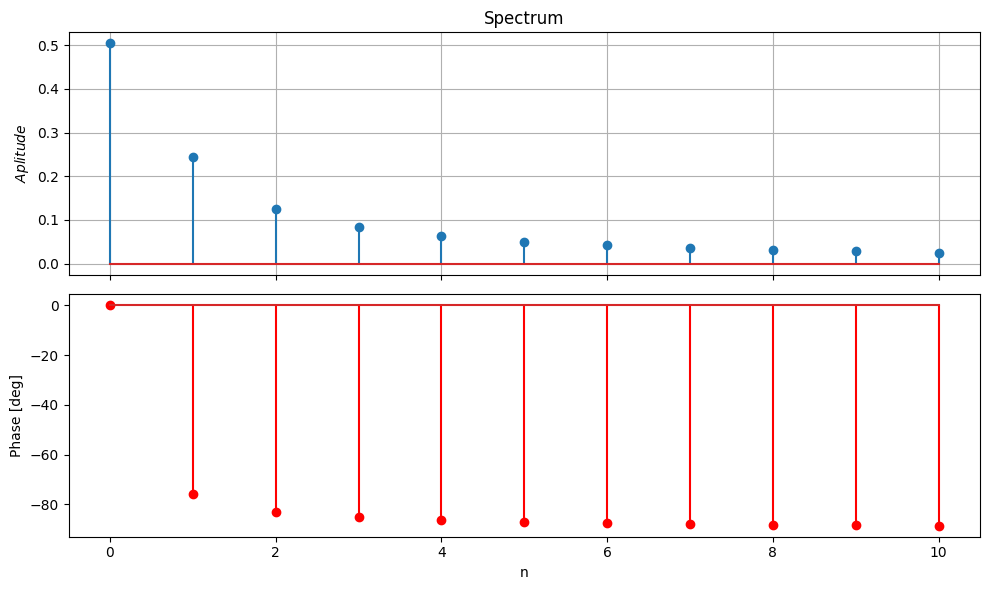

In [8]:
n, N = symbols('n N',integer=True,nenegative=True)
T0 = pi
a = 2/pi*integrate(x*cos(n*t*2*pi/T0), (t,0,T0))
b = 2/pi*integrate(x*sin(n*t*2*pi/T0), (t,0,T0))
a0 = a.subs(n,0)/2
Sn = a0 + Sum(a*cos(n*t*2)+b*sin(n*t*2), (n,1,N))
C = sqrt(a**2+b**2)
angle = atan(-b/a)

#plotting
fig, ax = plt.subplots(2,1,sharex=True,figsize=(10,6))
ax[0].stem(range(11), [a0,*[C.subs(n,i).evalf() for i in range(1,11)]])
ax[0].set_ylabel('$Aplitude$')
ax[0].set_title('Spectrum')
ax[0].grid(True)
#Make a new subplot below the first with the phase
ax[1].stem(range(11), [0,*[(angle.subs(n,i)*180/pi).evalf() for i in range(1,11)]], 'r')
ax[1].set_ylabel('Phase [deg]')
ax[1].tick_params('y')
ax[1].set_xlabel('n')
fig.tight_layout()
fig.show();


In [9]:
Sn

Sum(2*(-8*n/(16*n**2*exp(pi/2) + exp(pi/2)) + 8*n/(16*n**2 + 1))*sin(2*n*t)/pi + 2*(-2/(16*n**2*exp(pi/2) + exp(pi/2)) + 2/(16*n**2 + 1))*cos(2*n*t)/pi, (n, 1, N)) + (2 - 2*exp(-pi/2))/pi

In [10]:
Sn.subs(N,2).doit()

2*((2/17 - 2*exp(-pi/2)/17)*cos(2*t) + (2/65 - 2*exp(-pi/2)/65)*cos(4*t))/pi + 2*((8/17 - 8*exp(-pi/2)/17)*sin(2*t) + (16/65 - 16*exp(-pi/2)/65)*sin(4*t))/pi + (2 - 2*exp(-pi/2))/pi

/tmp/ipykernel_90537/217167726.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


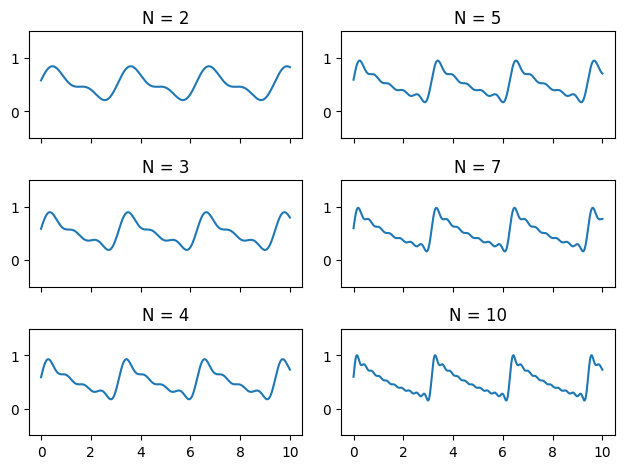

In [11]:
t0 = np.linspace(0,10,1000)
N0 = [2,5,3,7,4,10]
index = 0
fig, ax = plt.subplots(3,2,sharex=True)
for axa in ax.flatten():
    SN = Sn.subs(N,N0[index]).doit()
    axa.plot(t0, [SN.subs(t,i) for i in t0])
    axa.set_ylim(-0.5,1.5)
    axa.set_title('N = %i' % N0[index])
    index += 1
fig.tight_layout()
fig.show()

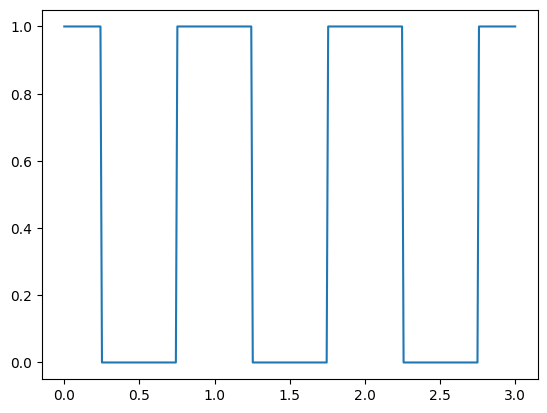

In [12]:
xstart = 25
t0 = np.linspace(0,4,400)
x0 = signal.square(2 * np.pi * t0,duty=1/2)
t1 = np.linspace(0,3,300)
x1 = (x0[xstart:len(t1)+xstart] + 1)/2
plt.plot(t1,x1);

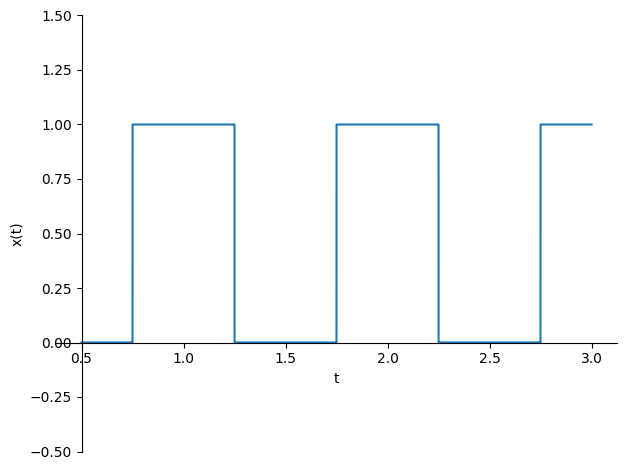

In [13]:
T0 = 1
x = Piecewise((S(0),Mod((t-S(1)/4),1)<S(T0)/2), (S(1), True))
plot(x, (t,0.5,3),ylim=(-0.5,1.5),axis_center=(0.5,0),xlabel='t',ylabel='x(t)');

In [14]:
n=Symbol('n',integer=True)
c = (S(1)/T0*integrate(x*exp(-j*2*pi*n*t/S(T0)), (t,0,T0))).simplify()
(c.subs(n,0)).simplify().doit()

Integral(Piecewise((0, Mod(t + 3/4, 1) < 1/2), (1, True)), (t, 0, 1))

In [15]:
x_simple = Piecewise((S(1),t<=S(1)/4*T0),(S(0),t<=S(3)/4*T0), (S(1), t<T0),(1,True)).simplify()
x_simple
c = (S(1)/T0*integrate(x_simple*exp(-j*2*pi*n*t/S(T0)), (t,0,T0))).simplify()

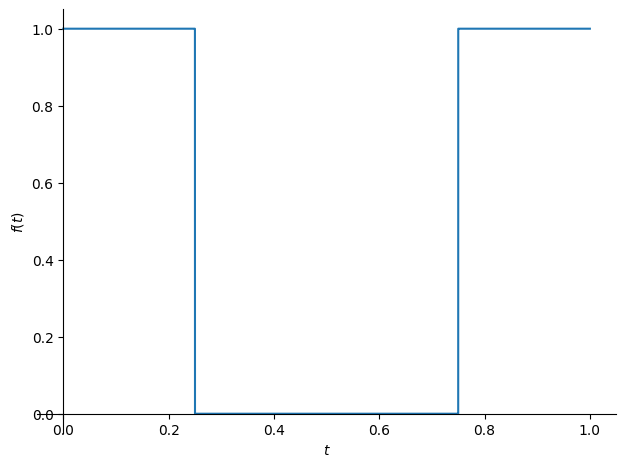

In [16]:
plot(x_simple,(t,0,T0))

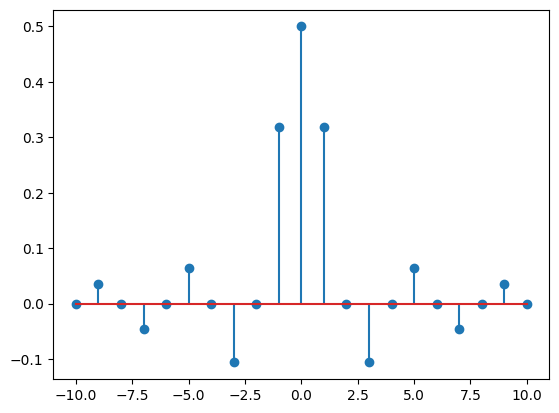

In [17]:
Sn = c*exp(j*2*pi*n*t/S(T0))
def SN(N):
    res = c.subs(n,0)*exp(j*2*pi*0*t/S(T0))
    for i in range(1,N+1):
        res += c.subs(n,i)*exp(j*2*pi*i*t/S(T0)) + c.subs(n,-i)*exp(-j*2*pi*i*t/S(T0))
        res.simplify()
    return res
t0 = np.linspace(0,10,1000)
fig,ax = plt.subplots()
ax.stem(range(-10,11),[(c).subs(n,i) for i in range(-10,11)]);

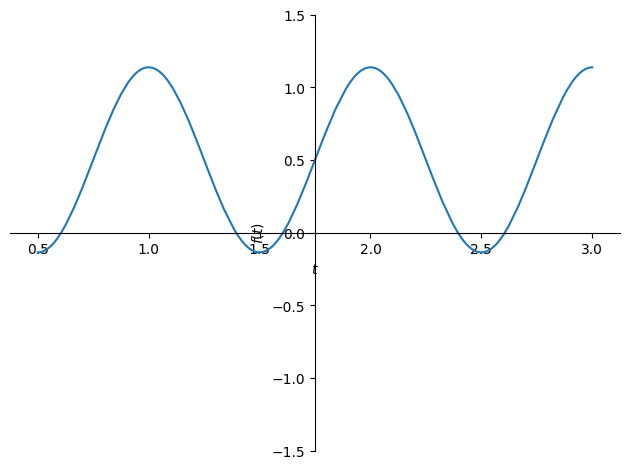

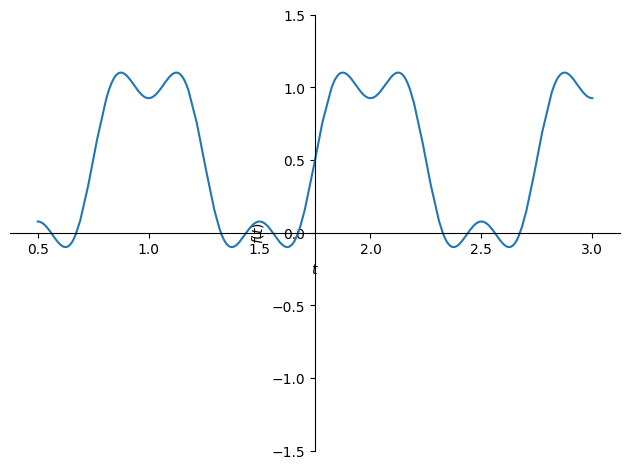

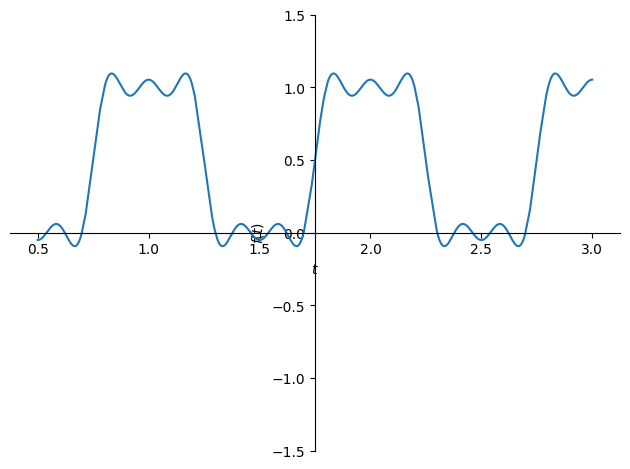

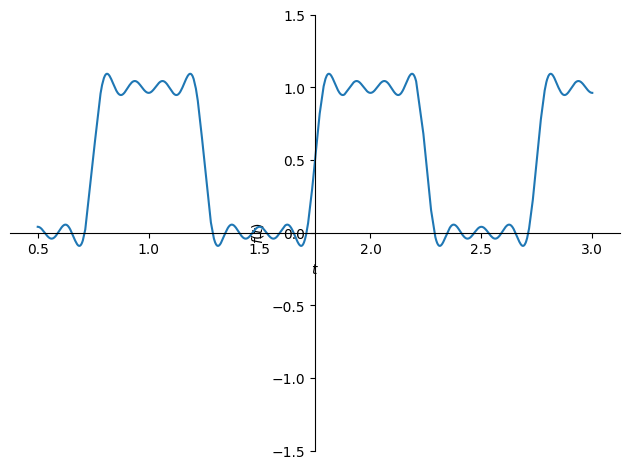

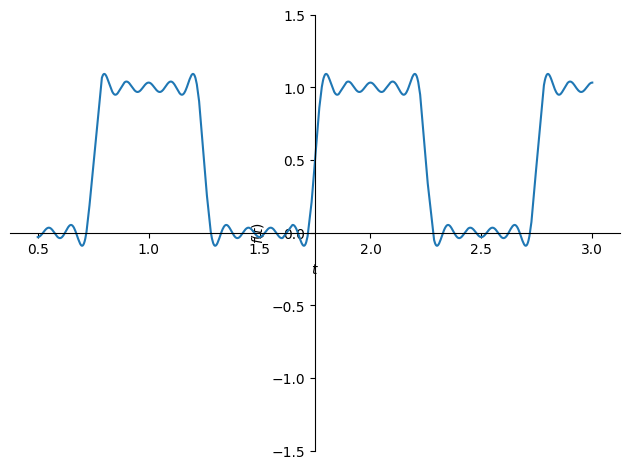

In [18]:
Sn = c*exp(j*2*pi*n*t/S(T0))
def SN(N):
    res = c.subs(n,0)*exp(j*2*pi*0*t/S(T0))
    for i in range(1,N+1):
        res += c.subs(n,i)*exp(j*2*pi*i*t/S(T0)) + c.subs(n,-i)*exp(-j*2*pi*i*t/S(T0))
        res.simplify()
    return res
for a in [2,3,5,7,9]:
    plot(SN(a), (t,0.5,3),ylim=(-1.5,1.5));